In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
pd.set_option('future.no_silent_downcasting', True)

In [52]:
from pandas import read_csv
data = read_csv("Metabolic Syndrome.csv")
data.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [53]:
data.drop(['seqn'],axis=1, inplace=True)
data.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [54]:
data.shape, data.isna().sum()

((2401, 14),
 Age                    0
 Sex                    0
 Marital              208
 Income               117
 Race                   0
 WaistCirc             85
 BMI                   26
 Albuminuria            0
 UrAlbCr                0
 UricAcid               0
 BloodGlucose           0
 HDL                    0
 Triglycerides          0
 MetabolicSyndrome      0
 dtype: int64)

In [55]:
data.dropna(axis=0,inplace=True)
data.shape, data.isna().sum()

((2009, 14),
 Age                  0
 Sex                  0
 Marital              0
 Income               0
 Race                 0
 WaistCirc            0
 BMI                  0
 Albuminuria          0
 UrAlbCr              0
 UricAcid             0
 BloodGlucose         0
 HDL                  0
 Triglycerides        0
 MetabolicSyndrome    0
 dtype: int64)

In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2009.0,49.263813,17.421740,20.0,35.00,49.00,63.00,80.00
Income,2009.0,4147.187656,2984.597463,300.0,1600.00,3500.00,6200.00,9000.00
WaistCirc,2009.0,98.524141,16.306348,63.1,86.90,97.10,107.80,170.50
BMI,2009.0,28.733499,6.580322,15.7,24.10,27.70,32.10,68.70
Albuminuria,2009.0,0.147337,0.416533,0.0,0.00,0.00,0.00,2.00
UrAlbCr,2009.0,42.253375,241.419903,1.4,4.46,6.96,13.49,4462.81
UricAcid,2009.0,5.491488,1.428865,1.8,4.50,5.40,6.40,11.30
BloodGlucose,2009.0,108.008462,33.636746,39.0,92.00,100.00,110.00,382.00
HDL,2009.0,53.551020,15.012329,14.0,43.00,51.00,62.00,150.00
Triglycerides,2009.0,126.892982,89.818470,26.0,75.00,103.00,149.00,1311.00


In [57]:
data.dtypes

Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome      int64
dtype: object

In [58]:
[col for col in data.columns if data[col].dtypes == "object"]

['Sex', 'Marital', 'Race']

In [59]:
#data['Sex'].replace({'Female': 0, 'Male': 1}, inplace=True)
data.replace({'Sex': {'Female': 0, 'Male': 1}}, inplace=True)


In [60]:
data['Sex'].value_counts()

Sex
0    1022
1     987
Name: count, dtype: int64

In [61]:
#[col for col in data.columns if data[col].dtypes == "object"]
data.select_dtypes(include='object')

,Sex,Marital,Race
0,1,Single,White
1,0,Married,White
2,1,Single,Asian
3,0,Single,Black
5,1,Widowed,White
...,...,...,...
2394,1,Married,Asian
2395,0,Married,MexAmerican
2398,1,Single,MexAmerican
2399,1,Married,MexAmerican


In [62]:
data.Marital.value_counts()

Marital
Married      1098
Single        460
Divorced      219
Widowed       144
Separated      88
Name: count, dtype: int64

In [63]:
data.replace({'Marital': {'Single': 0, 'Married': 1, 'Separated': 2, 'Divorced': 3, 'Widowed': 4}}, inplace=True)
data.Marital.value_counts()

Marital
1    1098
0     460
3     219
4     144
2      88
Name: count, dtype: int64

In [64]:
data['Race'].value_counts()

Race
White          806
Black          462
Asian          295
MexAmerican    198
Hispanic       198
Other           50
Name: count, dtype: int64

In [65]:
data.replace({'Race':{'Black': 0, 'Hispanic': 1, 'MexAmerican': 2, 'Asian': 3, 'White': 4, 'Other': 5}}, inplace=True)
data['Race'].value_counts()

Race
4    806
0    462
3    295
2    198
1    198
5     50
Name: count, dtype: int64

In [66]:
data['Sex'] = data['Sex'].astype(float)
data['Marital'] = data['Marital'].astype(float)
data['Race'] = data['Race'].astype(float)

In [67]:
data.dtypes

Age                    int64
Sex                  float64
Marital              float64
Income               float64
Race                 float64
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome      int64
dtype: object

In [68]:
data.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,1.0,0.0,8200.0,4.0,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,0.0,1.0,4500.0,4.0,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,1.0,0.0,800.0,3.0,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,0.0,0.0,2000.0,0.0,120.4,33.3,0,5.22,5.0,104,73,141,0
5,80,1.0,4.0,300.0,4.0,112.5,28.5,0,9.79,4.8,105,47,100,0


In [69]:
data.corr().style.background_gradient(cmap='coolwarm')

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
Age,1.000000,0.005180,0.452949,-0.045014,0.028969,0.238860,0.099314,0.208277,0.107090,0.146276,0.249467,0.050450,0.096683,0.276692
Sex,0.005180,1.000000,-0.106552,0.039917,0.050570,0.120470,-0.051271,0.032466,0.036852,0.398894,0.089969,-0.320546,0.141880,0.023318
Marital,0.452949,-0.106552,1.000000,-0.130858,0.017925,0.127593,0.073843,0.139444,0.039749,0.056070,0.100562,0.037708,0.065309,0.112135
Income,-0.045014,0.039917,-0.130858,1.000000,0.082108,-0.074313,-0.085924,-0.109709,-0.052712,0.008709,-0.094043,0.082505,-0.036322,-0.098800
Race,0.028969,0.050570,0.017925,0.082108,1.000000,-0.034718,-0.122755,-0.055772,-0.051494,0.017868,-0.036565,-0.064322,0.151273,0.001019
WaistCirc,0.238860,0.120470,0.127593,-0.074313,-0.034718,1.000000,0.909467,0.120229,0.043249,0.351764,0.279208,-0.353359,0.250379,0.491204
BMI,0.099314,-0.051271,0.073843,-0.085924,-0.122755,0.909467,1.000000,0.080160,0.023115,0.273564,0.219237,-0.291676,0.171272,0.431918
Albuminuria,0.208277,0.032466,0.139444,-0.109709,-0.055772,0.120229,0.080160,1.000000,0.564887,0.166195,0.201235,-0.033457,0.133788,0.157671
UrAlbCr,0.107090,0.036852,0.039749,-0.052712,-0.051494,0.043249,0.023115,0.564887,1.000000,0.125384,0.126018,-0.007046,0.093926,0.073257
UricAcid,0.146276,0.398894,0.056070,0.008709,0.017868,0.351764,0.273564,0.166195,0.125384,1.000000,0.062735,-0.262014,0.214550,0.250926


<Axes: >

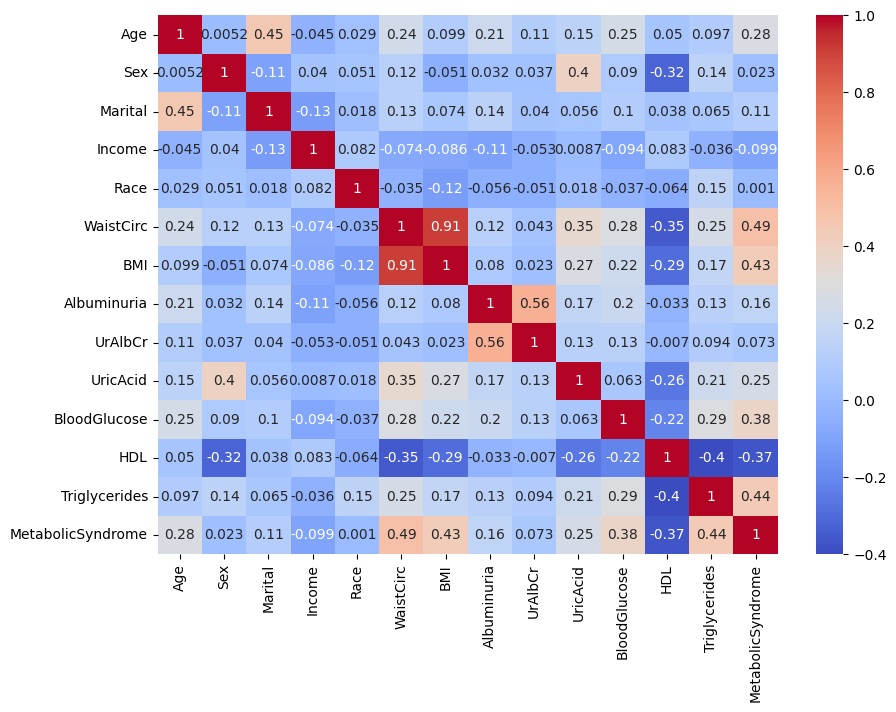

In [70]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')

<Axes: ylabel='count'>

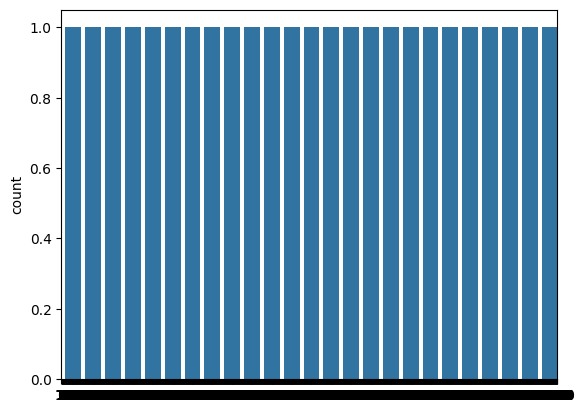

In [71]:
sns.countplot(data['Marital'], label ="Sum")

<Figure size 1000x1000 with 0 Axes>

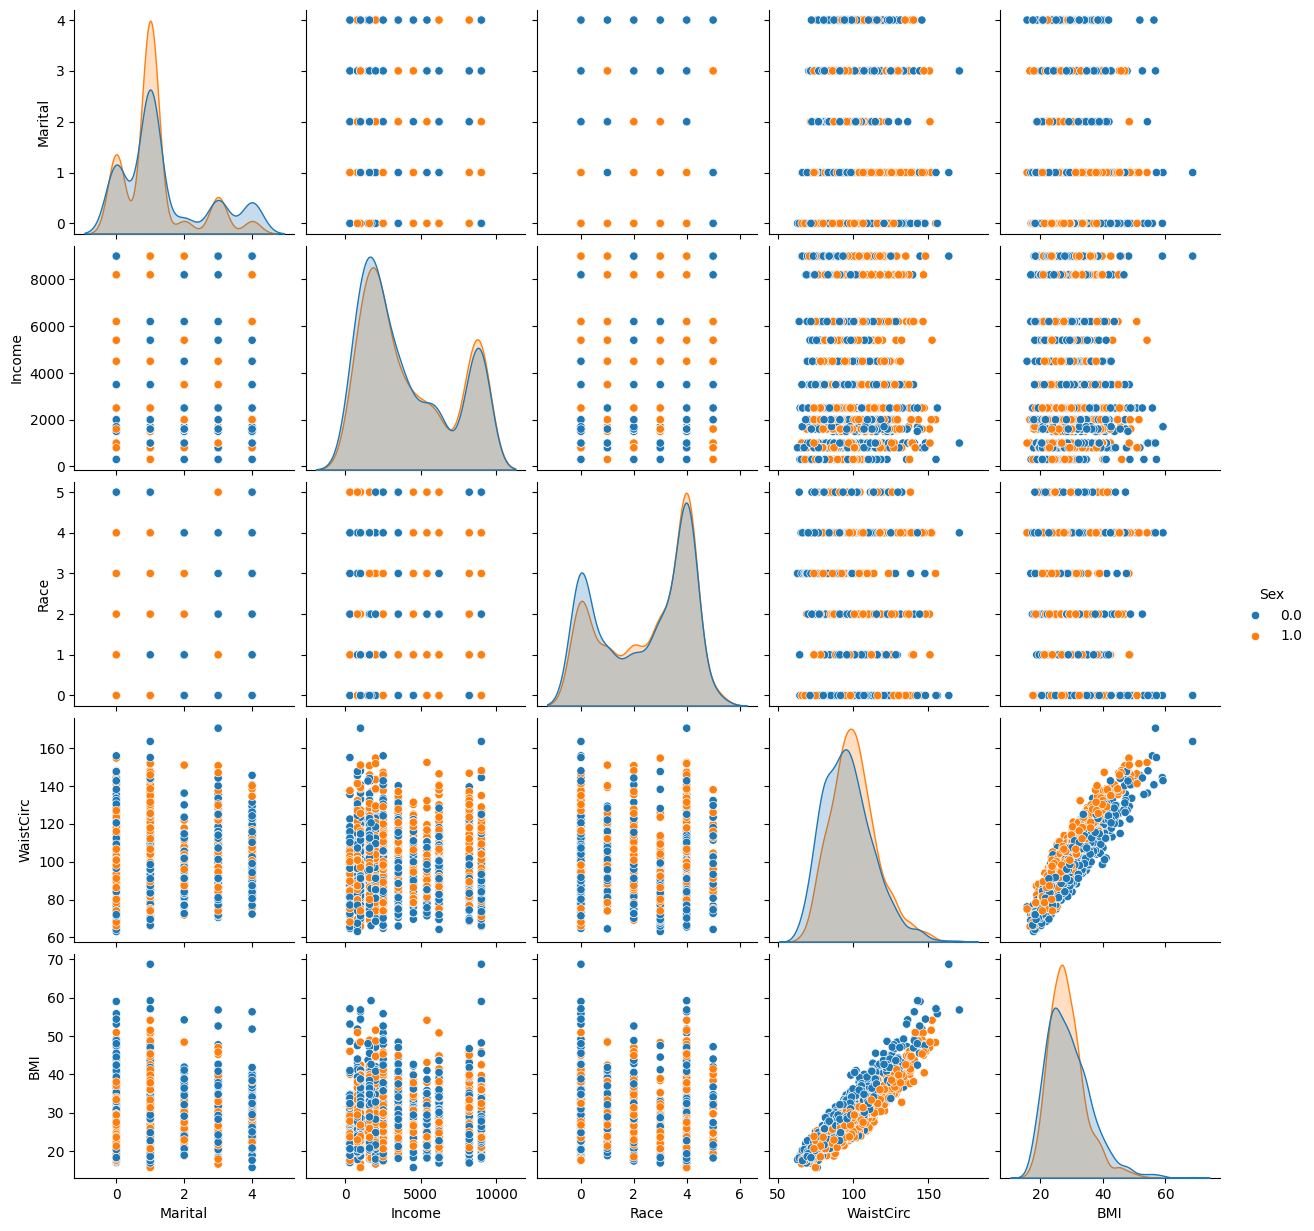

In [72]:
plt.figure(figsize=(10,10))
sns.pairplot(data.iloc[:, 1:7], hue="Sex")

In [73]:
data.corr()['MetabolicSyndrome']

Age                  0.276692
Sex                  0.023318
Marital              0.112135
Income              -0.098800
Race                 0.001019
WaistCirc            0.491204
BMI                  0.431918
Albuminuria          0.157671
UrAlbCr              0.073257
UricAcid             0.250926
BloodGlucose         0.376842
HDL                 -0.370963
Triglycerides        0.442063
MetabolicSyndrome    1.000000
Name: MetabolicSyndrome, dtype: float64

In [74]:
cor = data.corr()
cor_feature = cor['MetabolicSyndrome'].sort_values(ascending=False).to_frame()
cm = sns.light_palette("#5F9EA0", as_cmap=True)
style = cor_feature.style.background_gradient(cmap=cm)
style

,MetabolicSyndrome
MetabolicSyndrome,1.000000
WaistCirc,0.491204
Triglycerides,0.442063
BMI,0.431918
BloodGlucose,0.376842
Age,0.276692
UricAcid,0.250926
Albuminuria,0.157671
Marital,0.112135
UrAlbCr,0.073257


In [75]:
data.columns

Index(['Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

In [76]:
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X = data.drop(['MetabolicSyndrome'], axis=1)
#X = pd.DataFrame(scale_X.fit_transform(data.drop(["MetabolicSyndrome"],axis = 1),))
X.shape

(2009, 13)

In [77]:
y = data['MetabolicSyndrome']
y.shape

(2009,)

In [78]:
print(y)

0       0
1       0
2       0
3       0
5       0
       ..
2394    0
2395    1
2398    0
2399    1
2400    1
Name: MetabolicSyndrome, Length: 2009, dtype: int64


In [79]:
X

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
0,22,1.0,0.0,8200.0,4.0,81.0,23.3,0,3.88,4.9,92,41,84
1,44,0.0,1.0,4500.0,4.0,80.1,23.2,0,8.55,4.5,82,28,56
2,21,1.0,0.0,800.0,3.0,69.6,20.1,0,5.07,5.4,107,43,78
3,43,0.0,0.0,2000.0,0.0,120.4,33.3,0,5.22,5.0,104,73,141
5,80,1.0,4.0,300.0,4.0,112.5,28.5,0,9.79,4.8,105,47,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,31,1.0,1.0,2500.0,3.0,74.0,20.6,0,2.00,6.7,95,64,81
2395,65,0.0,1.0,5400.0,2.0,98.5,29.4,0,5.51,6.7,114,49,165
2398,28,1.0,0.0,800.0,2.0,100.8,29.4,0,2.78,6.2,99,47,84
2399,27,1.0,1.0,8200.0,2.0,106.6,31.3,0,4.15,6.2,100,41,124


In [80]:
from sklearn.metrics import accuracy_score,f1_score, precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [81]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1406, 13), (603, 13), (1406,), (603,))

In [82]:
models = [
    RandomForestClassifier(n_estimators=110, criterion='entropy'),
    LogisticRegression(max_iter=2000000),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(n_estimators=300),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB() 
    
    ]

In [83]:
evaluation_metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'f1 score' : f1_score,
    'Recall': recall_score
}

In [84]:
# Dictionary to evaluate performance of each model
model_performance={}
# loop through each model
for model in models:
    #train the model
    model.fit(X_train,y_train)
    
    #Evaluate or test the model
    y_predict = model.predict(X_test)
    
    #data frame to store score
    scores = {}
    
    for metric_name, metric_func in evaluation_metrics.items():
        #scores['metric_name'] = metric_func(y_test,y_predict)
        
        try:
            scores[metric_name] = metric_func(y_test, y_predict)
        except:
            scores[metric_name] = "Not applicable"
        
    # store the performance of the model
    model_performance[model.__class__.__name__] = scores
#print the performance of the models
for model_name, scores in model_performance.items():
    print(f"model: {model_name}")
    for metric_name, score in scores.items():
        print(f"{metric_name} {score}")
    print()
    

model: RandomForestClassifier
Accuracy 0.867330016583748
Precision 0.8177570093457944
f1 score 0.813953488372093
Recall 0.8101851851851852

model: LogisticRegression
Accuracy 0.8109452736318408
Precision 0.7451923076923077
f1 score 0.7311320754716981
Recall 0.7175925925925926

model: ExtraTreesClassifier
Accuracy 0.8407960199004975
Precision 0.7912621359223301
f1 score 0.7725118483412322
Recall 0.7546296296296297

model: GradientBoostingClassifier
Accuracy 0.867330016583748
Precision 0.8008849557522124
f1 score 0.8190045248868778
Recall 0.8379629629629629

model: SVC
Accuracy 0.6467661691542289
Precision 1.0
f1 score 0.0273972602739726
Recall 0.013888888888888888

model: KNeighborsClassifier
Accuracy 0.7711442786069652
Precision 0.6893203883495146
f1 score 0.6729857819905213
Recall 0.6574074074074074

model: GaussianNB
Accuracy 0.7761194029850746
Precision 0.7189189189189189
f1 score 0.6633416458852868
Recall 0.6157407407407407



In [85]:
# Find the best model
best_model_name = max(model_performance, key=lambda x: model_performance[x]['Accuracy'])
best_accuracy = model_performance[best_model_name]['Accuracy']

print("Best model:", best_model_name)
print("Best accuracy:", best_accuracy)

Best model: RandomForestClassifier
Best accuracy: 0.867330016583748


In [86]:
nb = GaussianNB()
nb_mod = nb.fit(X_train, y_train)
print(f"Base results: {nb_mod.score(X_test, y_test)}")

nb_pred = nb_mod.predict(X_test)
#print(f"final results: {nb_pred}")


Base results: 0.7761194029850746


In [87]:
acc = accuracy_score(y_test, nb_pred)
f1 = f1_score(y_test, nb_pred)
prec = precision_score(y_test, nb_pred)
acc, f1, prec

(0.7761194029850746, 0.6633416458852868, 0.7189189189189189)

In [88]:
#%pip install lightgbm


In [89]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ADB = AdaBoostClassifier(n_estimators=100)
GB = GradientBoostingClassifier(n_estimators=300)

ADB_model = ADB.fit(X_train,y_train)
print(f"ADB score: {ADB_model.score(X_test, y_test)}")

GB_model = GB.fit(X_train, y_train)

print(f"GB: {GB_model.score(X_train, y_train)}")

/Users/macbook/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ADB score: 0.8590381426202321
GB: 1.0


In [90]:
GB_pred = GB_model.predict(X_test)
acc = accuracy_score(y_test, GB_pred)
print(f"Gradient Boosting Accuracy: {acc}")

Gradient Boosting Accuracy: 0.867330016583748


In [91]:
# import lightgbm as lgb
# params = {
#     'objective': 'binary', # for binary classification
#     'metric': 'binary_error' # use binary error as the evaluation metric
# }
# l_model = lgb.train(params, X_train, num_boost_round=100, valid_sets=[X_test])

In [92]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
LGB_model = LGBMClassifier(learning_rate=0.5, n_estimators=100, random_state=42, num_leaves=10)

LGB_model.fit(X_train,y_train, eval_set=[(X_test,y_test),(X_train,y_train)], eval_metric='logloss') 

[LightGBM] [Info] Number of positive: 496, number of negative: 910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1348
[LightGBM] [Info] Number of data points in the train set: 1406, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352774 -> initscore=-0.606869
[LightGBM] [Info] Start training from score -0.606869


LGBMClassifier(learning_rate=0.5, num_leaves=10, random_state=42)

In [93]:
print(f"Training Accuracy: {round(LGB_model.score(X_train,y_train), 2)}")
print(f"Testing Accuracy: {round(LGB_model.score(X_test, y_test), 2)}")

Training Accuracy: 1.0
Testing Accuracy: 0.89


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

<Figure size 300x300 with 0 Axes>

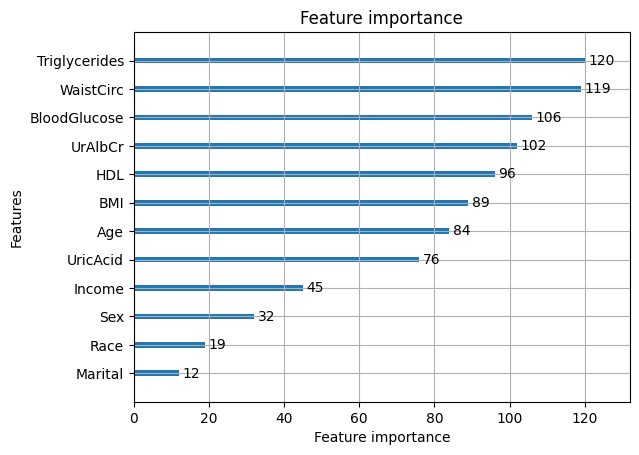

In [94]:
plt.figure(figsize=(3,3))
lgb.plot_importance(LGB_model)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

<Figure size 200x200 with 0 Axes>

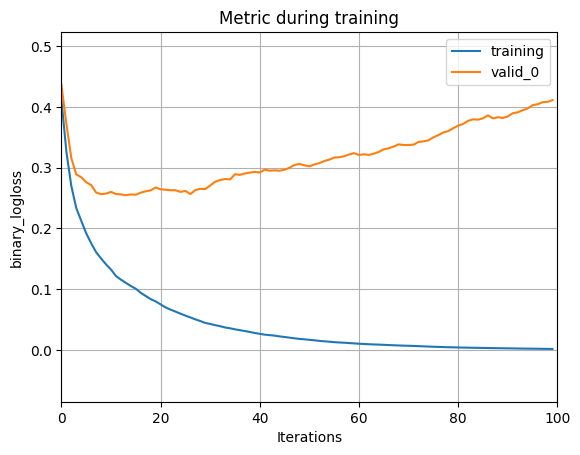

In [95]:
plt.figure(figsize=(2,2))
lgb.plot_metric(LGB_model)

In [96]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(learning_rate=5, depth= 10, n_estimators=120)
cat_model = cat.fit(X_train, y_train)
print(f"Training Accuracy: {cat_model.score(X_train,y_train)}")
print(f"Testing Accuracy: {cat_model.score(X_test,y_test)}") 

0:	learn: 0.4545574	total: 16.9ms	remaining: 2.01s
1:	learn: 0.2674088	total: 34.2ms	remaining: 2.02s
2:	learn: 0.1548749	total: 45.9ms	remaining: 1.79s
3:	learn: 0.1521618	total: 64.6ms	remaining: 1.87s
4:	learn: 0.0843377	total: 74.3ms	remaining: 1.71s


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


5:	learn: 0.0615797	total: 87ms	remaining: 1.65s
6:	learn: 0.0502853	total: 96.3ms	remaining: 1.55s
7:	learn: 0.0407642	total: 105ms	remaining: 1.47s
8:	learn: 0.0367476	total: 114ms	remaining: 1.4s
9:	learn: 0.0329270	total: 123ms	remaining: 1.35s
10:	learn: 0.0318225	total: 131ms	remaining: 1.3s
11:	learn: 0.0301480	total: 141ms	remaining: 1.26s
12:	learn: 0.0260475	total: 150ms	remaining: 1.23s
13:	learn: 0.0213104	total: 160ms	remaining: 1.21s
14:	learn: 0.0179117	total: 169ms	remaining: 1.18s
15:	learn: 0.0160084	total: 179ms	remaining: 1.16s
16:	learn: 0.0151971	total: 189ms	remaining: 1.14s
17:	learn: 0.0141922	total: 198ms	remaining: 1.12s
18:	learn: 0.0129631	total: 207ms	remaining: 1.1s
19:	learn: 0.0117578	total: 216ms	remaining: 1.08s
20:	learn: 0.0108518	total: 225ms	remaining: 1.06s
21:	learn: 0.0105578	total: 235ms	remaining: 1.04s
22:	learn: 0.0100346	total: 244ms	remaining: 1.03s
23:	learn: 0.0092700	total: 253ms	remaining: 1.01s
24:	learn: 0.0086484	total: 262ms	remai

<Figure size 300x300 with 0 Axes>

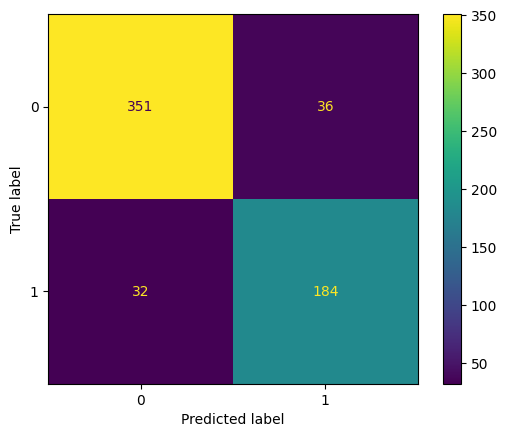

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
plt.figure(figsize=(3,3))
l_pred = LGB_model.predict(X_test)
l_confusion = confusion_matrix(y_test, l_pred)
ConfusionMatrixDisplay(l_confusion).plot()

In [98]:
X_test.dtypes

Age                int64
Sex              float64
Marital          float64
Income           float64
Race             float64
WaistCirc        float64
BMI              float64
Albuminuria        int64
UrAlbCr          float64
UricAcid         float64
BloodGlucose       int64
HDL                int64
Triglycerides      int64
dtype: object

In [99]:
from sklearn.metrics import classification_report
#classification_report(X_test, l_pred)

In [101]:
print(l_confusion)

[[351  36]
 [ 32 184]]
